[View in Colaboratory](https://colab.research.google.com/github/shivamgoel1791/Kadenze_Image_dataset_processing/blob/master/Kadenze_celebface_dataset.ipynb)

In [43]:
!git clone https://github.com/pkmital/CADL

Cloning into 'CADL'...
remote: Counting objects: 2064, done.
remote: Total 2064 (delta 0), reused 0 (delta 0), pack-reused 2064
Receiving objects: 100% (2064/2064), 305.20 MiB | 41.02 MiB/s, done.
Resolving deltas: 100% (1027/1027), done.


In [44]:
cd CADL/session-1/

/content/CADL/session-1


In [4]:
!git clone https://github.com/shivamgoel1791/BMW_Car_dataset

Cloning into 'BMW_Car_dataset'...
remote: Counting objects: 222, done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 222 (delta 0), reused 0 (delta 0), pack-reused 219
Receiving objects: 100% (222/222), 7.85 MiB | 36.69 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [5]:
ls

BMW_Car_dataset/  lecture-1.ipynb  libs/  README.md  session-1.ipynb  tests/


In [0]:
!mv /content/BMW_Car_dataset/ /content/CADL/session-1/

In [7]:
#!git clone https://github.com/shivamgoel1791/Kadenze_Image_dataset_processing/

Cloning into 'Kadenze_Image_dataset_processing'...
remote: Counting objects: 222, done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 222 (delta 0), reused 0 (delta 0), pack-reused 219
Receiving objects: 100% (222/222), 7.85 MiB | 39.38 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [0]:
#mv /content/CADL/session-1/img_align_celeba/Kadenze_Image_dataset_processing/celeb_images/*.* /content/CADL/session-1/img_align_celeba

In [45]:
%pylab

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [0]:
plt.style.use('ggplot')


In [0]:
%matplotlib inline

In [0]:
from libs import utils

In [79]:
mkdir img_align_celeba

mkdir: cannot create directory ‘img_align_celeba’: File exists


In [49]:
files = utils.get_celeb_files()

In [50]:
files

['img_align_celeba/000079.jpg',
 'img_align_celeba/000053.jpg',
 'img_align_celeba/000009.jpg',
 'img_align_celeba/000072.jpg',
 'img_align_celeba/000074.jpg',
 'img_align_celeba/000003.jpg',
 'img_align_celeba/000048.jpg',
 'img_align_celeba/000054.jpg',
 'img_align_celeba/000014.jpg',
 'img_align_celeba/000066.jpg',
 'img_align_celeba/000025.jpg',
 'img_align_celeba/000016.jpg',
 'img_align_celeba/000041.jpg',
 'img_align_celeba/000013.jpg',
 'img_align_celeba/000087.jpg',
 'img_align_celeba/000094.jpg',
 'img_align_celeba/000024.jpg',
 'img_align_celeba/000061.jpg',
 'img_align_celeba/000026.jpg',
 'img_align_celeba/000030.jpg',
 'img_align_celeba/000027.jpg',
 'img_align_celeba/000084.jpg',
 'img_align_celeba/000029.jpg',
 'img_align_celeba/000095.jpg',
 'img_align_celeba/000064.jpg',
 'img_align_celeba/000045.jpg',
 'img_align_celeba/000093.jpg',
 'img_align_celeba/000033.jpg',
 'img_align_celeba/000085.jpg',
 'img_align_celeba/000099.jpg',
 'img_align_celeba/000067.jpg',
 'img_al

In [51]:
files[1]

'img_align_celeba/000053.jpg'

In [0]:
img  = plt.imread(files[1])

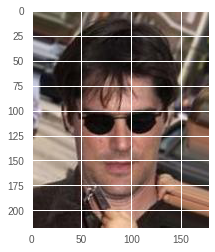

In [53]:
plt.imshow(img)

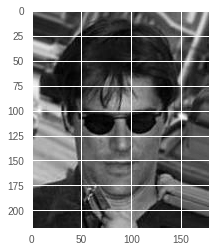

In [54]:
plt.imshow(img[:,:,0],cmap='gray')
plt.imshow(img[:,:,1],cmap='gray')
plt.imshow(img[:,:,2],cmap='gray')

In [55]:
#plt.imshow(files[0])
img = utils.get_celeb_imgs()
"""
def get_celeb_imgs():
    return [plt.imread(f_i) for f_i in get_celeb_files()]"""

'\ndef get_celeb_imgs():\n    return [plt.imread(f_i) for f_i in get_celeb_files()]'

In [0]:
??utils.get_celeb_files

In [57]:
img

[array([[[143,  28,  41],
         [143,  28,  41],
         [143,  28,  41],
         ...,
         [ 87,  12,  16],
         [ 88,  13,  18],
         [ 88,  13,  18]],
 
        [[143,  28,  41],
         [143,  28,  41],
         [143,  28,  41],
         ...,
         [ 87,  12,  16],
         [ 88,  13,  18],
         [ 88,  13,  18]],
 
        [[143,  28,  41],
         [143,  28,  41],
         [143,  28,  41],
         ...,
         [ 87,  12,  16],
         [ 88,  13,  18],
         [ 88,  13,  18]],
 
        ...,
 
        [[ 16,  16,  16],
         [ 20,  20,  20],
         [ 21,  21,  21],
         ...,
         [ 24,  24,  24],
         [ 19,  19,  21],
         [ 19,  19,  21]],
 
        [[ 20,  20,  20],
         [ 20,  20,  20],
         [ 20,  20,  20],
         ...,
         [ 23,  23,  23],
         [ 24,  24,  26],
         [ 24,  24,  26]],
 
        [[ 20,  20,  20],
         [ 20,  20,  20],
         [ 20,  20,  20],
         ...,
         [ 23,  23,  23],
  

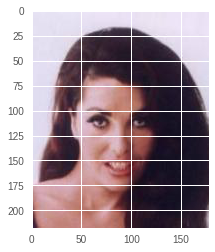

In [58]:
plt.imshow(img[90])

In [0]:
def imcrop_tosquare(img):
    if img.shape[0] > img.shape[1]:
        extra = (img.shape[0] - img.shape[1])
        if extra % 2 == 0:
            crop = img[extra // 2:-extra // 2, :]
        else:
            crop = img[max(0, extra // 2 + 1):min(-1, -(extra // 2)), :]
    elif img.shape[1] > img.shape[0]:
        extra = (img.shape[1] - img.shape[0])
        if extra % 2 == 0:
            crop = img[:, extra // 2:-extra // 2]
        else:
            crop = img[:, max(0, extra // 2 + 1):min(-1, -(extra // 2))]
    else:
        crop = img
    return crop

In [0]:
def imcrop(img, amt):
    if amt <= 0 or amt >= 1:
        return img
    row_i = int(img.shape[0] * amt) // 2
    col_i = int(img.shape[1] * amt) // 2
    return img[row_i:-row_i, col_i:-col_i]

In [0]:
from scipy.misc import imresize

In [62]:
imgs  =  []
for file_i in files:
    img  =  plt.imread(file_i)
    square  =  imcrop_tosquare(img)
    crop = imcrop(square, 0.2)
    rsz = imresize(crop, (64, 64))
    imgs.append(rsz)
print(len(imgs))

100


/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


In [0]:
for i in range(len(imgs)):
  if imgs[i].shape[2] == 4:
    print (files[i])

In [0]:
data = np.array(imgs)

In [0]:
#files.index('img_align_celeba/httpwwwrumenewscomwpcontentuploadsbenafflekxpng.jpg')

In [0]:
#t = plt.imread('img_align_celeba/httpwwwrumenewscomwpcontentuploadsbenafflekxpng.jpg')
#t.shape

In [0]:
#a = imgs[96]
#print (a.shape)
#a = a[:,:,:3]
#print (a.shape)

In [0]:
#imgs[96] = a

In [0]:
#data =np.array(imgs)

In [70]:
data.shape

(100, 64, 64, 3)

In [0]:
mean_img = np.mean(data,axis = 0)

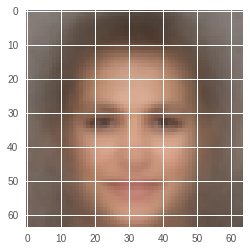

In [72]:
plt.imshow(mean_img.astype(np.uint8))

In [0]:
std_img = np.std(data, axis = 0)

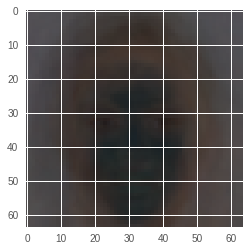

In [74]:
plt.imshow(std_img.astype(np.uint8))

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The Vega20b_r colormap was deprecated in version 2.0. Use tab20b_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


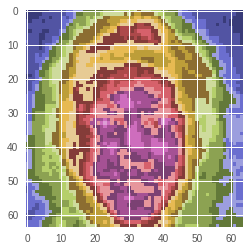

In [75]:
plt.imshow(np.mean(std_img, axis = 2).astype(np.uint8),cmap = 'Vega20b_r')

In [0]:
flattened = data.ravel()

In [77]:
data

array([[[[161, 149, 143],
         [168, 144, 140],
         [161, 112, 113],
         ...,
         [123, 106,  90],
         [122, 105,  89],
         [121, 104,  88]],

        [[155, 151, 146],
         [163, 147, 142],
         [161, 113, 115],
         ...,
         [123, 106,  90],
         [122, 105,  89],
         [121, 104,  88]],

        [[157, 150, 145],
         [161, 147, 142],
         [162, 115, 116],
         ...,
         [123, 106,  90],
         [122, 105,  89],
         [121, 104,  88]],

        ...,

        [[129,  12,  30],
         [125,  14,  30],
         [126,  13,  30],
         ...,
         [ 35,  32,  32],
         [ 34,  26,  28],
         [ 32,  18,  18]],

        [[126,  12,  32],
         [125,  13,  30],
         [125,  12,  30],
         ...,
         [ 28,  28,  28],
         [ 29,  29,  29],
         [ 34,  32,  33]],

        [[118,  16,  30],
         [120,  15,  29],
         [123,  13,  28],
         ...,
         [ 19,  19,  19],
        

In [78]:
flattened[:10]

array([161, 149, 143, 168, 144, 140, 161, 112, 113, 123], dtype=uint8)

(array([8265., 6986., 7689., 5694., 5230., 5071., 4994., 5103., 4985.,
        5166., 5418., 5611., 5848., 6108., 6074., 5959., 6151., 6346.,
        6282., 6355., 6181., 6254., 6224., 6098., 5894., 5754., 5922.,
        5925., 6038., 6017., 6368., 5891., 6001., 6067., 6130., 6284.,
        6376., 6389., 6595., 6516., 6391., 6180., 6131., 6240., 6581.,
        6062., 5865., 6009., 5761., 6076., 5734., 5746., 5715., 5598.,
        5485., 5242., 5300., 5191., 5135., 5102., 4962., 4907., 4866.,
        4838., 4968., 4884., 4979., 4890., 4996., 4998., 4955., 4877.,
        4932., 4989., 4913., 4984., 4870., 4902., 4955., 4978., 4873.,
        4939., 5186., 5136., 5017., 4938., 5005., 4906., 4979., 4872.,
        4986., 5018., 5104., 5007., 4880., 4864., 5155., 4878., 5132.,
        5064., 5163., 4960., 4990., 5001., 5045., 5218., 5038., 5066.,
        5108., 5066., 5168., 5272., 5151., 5199., 5337., 5366., 5449.,
        5395., 5430., 5365., 5613., 5401., 5386., 5411., 5298., 5313.,
      

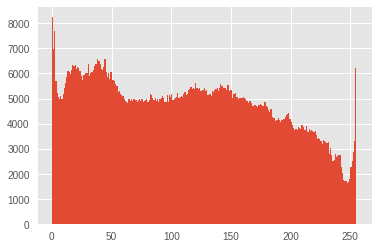

In [79]:
plt.hist(flattened,bins = 255)

In [0]:
bins = 20

Text(0.5,1,'img - mean')

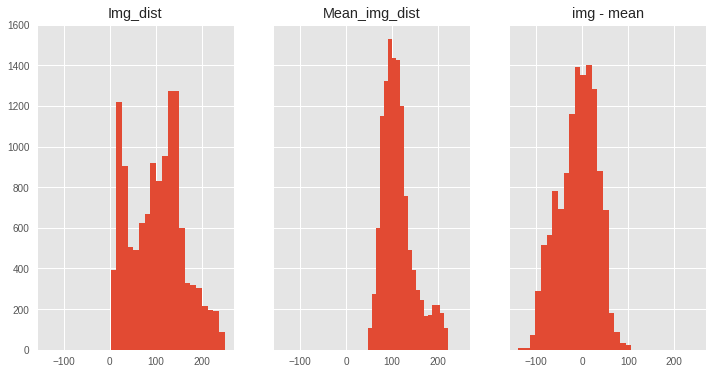

In [83]:
fig, axs = plt.subplots(1,3,figsize = (12,6),sharex = True, sharey = True)
axs[0].hist((data[0]).ravel(),bins)
axs[0].set_title('Img_dist')
axs[1].hist(mean_img.ravel(),bins)
axs[1].set_title('Mean_img_dist')
axs[2].hist((data[0]-mean_img).ravel(),bins)
axs[2].set_title('img - mean')

Text(0.5,1,'normal')

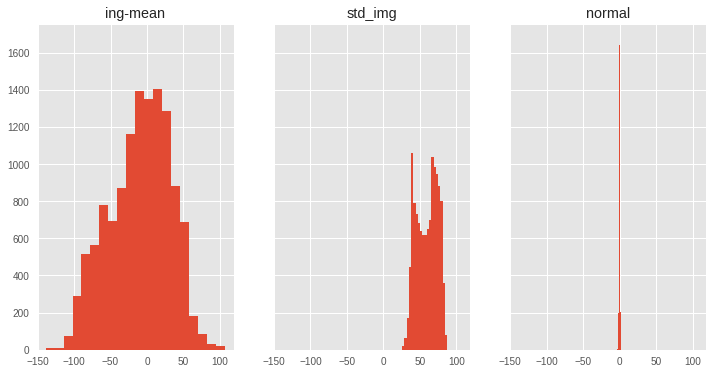

In [85]:
figs, axs = plt.subplots(1,3,figsize = (12,6), sharey = True, sharex = True)
axs[0].hist((data[0]-mean_img).ravel(),bins)
axs[0].set_title('ing-mean')
axs[1].hist((std_img).ravel(),bins)
axs[1].set_title('std_img')
axs[2].hist(((data[0]-mean_img)/std_img).ravel(),bins)
axs[2].set_title('normal')

In [0]:
#@title Tensorflow basics { run: "auto", vertical-output: true, output-height: 400, form-width: "400px" }


























In [0]:
import tensorflow as tf
import numpy as np

In [0]:
x = np.linspace(-3.0,3.0,100)

In [5]:
x

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

In [0]:
x = tf.linspace(-3.0,3.0,100)

In [7]:
x

<tf.Tensor 'LinSpace:0' shape=(100,) dtype=float32>

In [0]:
#We may also define a new graph instead of the default graph
g2 = tf.Graph()

In [37]:
sess = tf.Session(graph = tf.get_default_graph())
t = sess.run(x) #this is like telling the session to run and evaluate anything like (x) in this case
print (t)
sess.close()

sess = tf.Session()
t = x.eval(session = sess) #this is like telling x to evaluate itself using sess session
print (t)
sess.close()

[-3.         -2.939394   -2.878788   -2.8181818  -2.7575758  -2.6969697
 -2.6363635  -2.5757575  -2.5151515  -2.4545455  -2.3939395  -2.3333333
 -2.2727273  -2.2121212  -2.151515   -2.090909   -2.030303   -1.969697
 -1.9090909  -1.8484848  -1.7878788  -1.7272727  -1.6666666  -1.6060605
 -1.5454545  -1.4848485  -1.4242424  -1.3636363  -1.3030303  -1.2424242
 -1.1818181  -1.121212   -1.060606   -0.99999994 -0.9393939  -0.8787878
 -0.81818175 -0.7575757  -0.6969696  -0.63636357 -0.5757575  -0.51515144
 -0.45454538 -0.39393932 -0.33333325 -0.2727272  -0.21212113 -0.15151507
 -0.090909   -0.03030294  0.03030312  0.09090918  0.15151525  0.21212131
  0.27272737  0.33333343  0.3939395   0.45454556  0.5151516   0.5757577
  0.63636374  0.6969698   0.75757587  0.81818193  0.878788    0.93939406
  1.0000001   1.0606062   1.1212122   1.1818182   1.2424244   1.3030305
  1.3636365   1.4242425   1.4848486   1.5454547   1.6060607   1.6666667
  1.7272729   1.787879    1.848485    1.909091    1.9696971  

In [38]:
sess = tf.InteractiveSession()
x.eval(session = sess)
#sess.close()

array([-3.        , -2.939394  , -2.878788  , -2.8181818 , -2.7575758 ,
       -2.6969697 , -2.6363635 , -2.5757575 , -2.5151515 , -2.4545455 ,
       -2.3939395 , -2.3333333 , -2.2727273 , -2.2121212 , -2.151515  ,
       -2.090909  , -2.030303  , -1.969697  , -1.9090909 , -1.8484848 ,
       -1.7878788 , -1.7272727 , -1.6666666 , -1.6060605 , -1.5454545 ,
       -1.4848485 , -1.4242424 , -1.3636363 , -1.3030303 , -1.2424242 ,
       -1.1818181 , -1.121212  , -1.060606  , -0.99999994, -0.9393939 ,
       -0.8787878 , -0.81818175, -0.7575757 , -0.6969696 , -0.63636357,
       -0.5757575 , -0.51515144, -0.45454538, -0.39393932, -0.33333325,
       -0.2727272 , -0.21212113, -0.15151507, -0.090909  , -0.03030294,
        0.03030312,  0.09090918,  0.15151525,  0.21212131,  0.27272737,
        0.33333343,  0.3939395 ,  0.45454556,  0.5151516 ,  0.5757577 ,
        0.63636374,  0.6969698 ,  0.75757587,  0.81818193,  0.878788  ,
        0.93939406,  1.0000001 ,  1.0606062 ,  1.1212122 ,  1.18

In [0]:
y = tf.range(4,10,1)

In [40]:
y

<tf.Tensor 'range:0' shape=(6,) dtype=int32>

In [41]:
y.eval()

array([4, 5, 6, 7, 8, 9], dtype=int32)

In [0]:
import matplotlib.pyplot as plt

In [0]:
x = tf.linspace(-3.0,3.0,100)
mean = 0
sigma = 1.0
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

In [23]:
print (z.get_shape().as_list())

[100]


In [0]:
sess = tf.InteractiveSession()

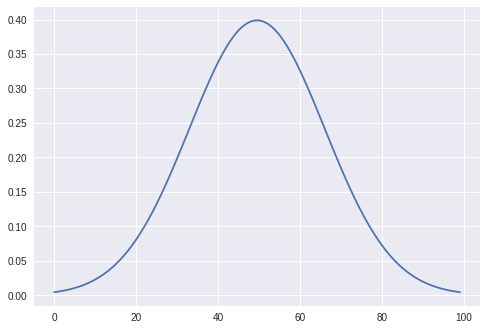

In [25]:
plt.plot(z.eval())

In [0]:
z2 = tf.matmul(tf.reshape(z,(100,1)),tf.reshape(z,(1,100)))

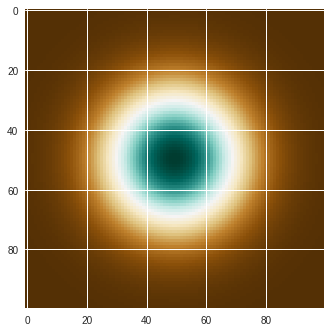

In [27]:
plt.imshow(z2.eval(),cmap = 'BrBG')

In [0]:
#@title Convolving an image with Gaussian


In [0]:
import tensorflow as tf
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

In [0]:
img = data.camera().astype(np.float32)

In [6]:
img.shape

(512, 512)

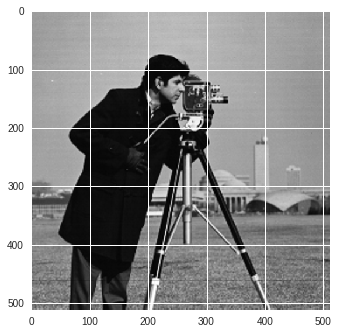

In [10]:
plt.imshow(img,cmap = 'gray')

In [0]:
sess = tf.InteractiveSession()

In [0]:
img_4d = tf.reshape(img,(1,img.shape[0], img.shape[1],1))

In [0]:
res = img_4d.eval()

In [21]:
img_4d.get_shape().as_list()

[1, 512, 512, 1]

In [0]:
#reshaping our kernel size
z_4d = tf.reshape(z2,(100,100,1,1))

In [38]:
z_4d.get_shape().as_list()

[100, 100, 1, 1]

In [0]:
convolved = tf.nn.conv2d(img_4d,z_4d,strides = [1,1,1,1], padding = 'SAME')

In [0]:
res2 = convolved.eval()

In [42]:
res2.shape

(1, 512, 512, 1)

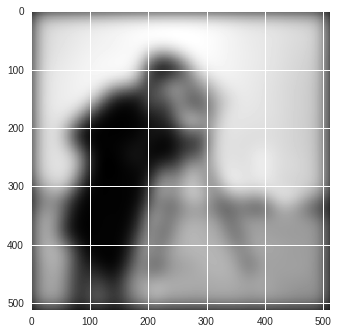

In [43]:
plt.imshow(np.squeeze(res2), cmap = 'gray')

In [0]:
ksize = 100

In [0]:
xs = tf.linspace(-3.0, 3.0, ksize)

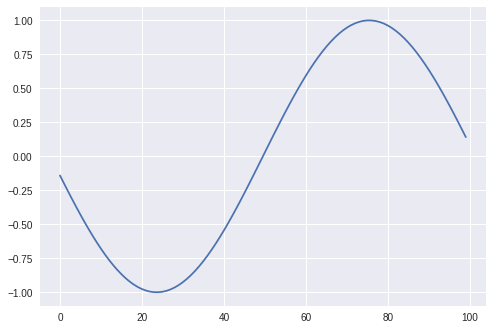

In [55]:
ys = tf.sin(xs)
plt.figure()
plt.plot(ys.eval())

In [0]:
ys = tf.reshape(ys, [ksize, 1])

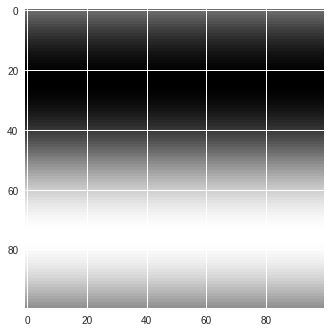

In [57]:
ones = tf.ones((1, ksize))
wave = tf.matmul(ys, ones)
plt.imshow(wave.eval(), cmap='gray')

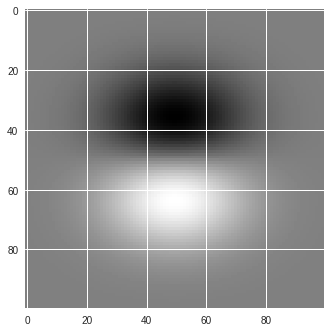

In [59]:
gabor = tf.multiply(wave, z2)
plt.imshow(gabor.eval(), cmap='gray')

In [60]:
# This is a placeholder which will become part of the tensorflow graph, but
# which we have to later explicitly define whenever we run/evaluate the graph.
# Pretty much everything you do in tensorflow can have a name.  If we don't
# specify the name, tensorflow will give a default one, like "Placeholder_0".
# Let's use a more useful name to help us understand what's happening.
img = tf.placeholder(tf.float32, shape=[None, None], name='img')


# We'll reshape the 2d image to a 3-d tensor just like before:
# Except now we'll make use of another tensorflow function, expand dims, which adds a singleton dimension at the axis we specify.
# We use it to reshape our H x W image to include a channel dimension of 1
# our new dimensions will end up being: H x W x 1
img_3d = tf.expand_dims(img, 2)
dims = img_3d.get_shape()
print(dims)

# And again to get: 1 x H x W x 1
img_4d = tf.expand_dims(img_3d, 0)
print(img_4d.get_shape().as_list())

# Let's create another set of placeholders for our Gabor's parameters:
mean = tf.placeholder(tf.float32, name='mean')
sigma = tf.placeholder(tf.float32, name='sigma')
ksize = tf.placeholder(tf.int32, name='ksize')

# Then finally redo the entire set of operations we've done to convolve our
# image, except with our placeholders
x = tf.linspace(-3.0, 3.0, ksize)
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
      (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
z_2d = tf.matmul(
  tf.reshape(z, tf.stack([ksize, 1])),
  tf.reshape(z, tf.stack([1, ksize])))
ys = tf.sin(x)
ys = tf.reshape(ys, tf.stack([ksize, 1]))
ones = tf.ones(tf.stack([1, ksize]))
wave = tf.matmul(ys, ones)
gabor = tf.multiply(wave, z_2d)
gabor_4d = tf.reshape(gabor, tf.stack([ksize, ksize, 1, 1]))

# And finally, convolve the two:
convolved = tf.nn.conv2d(img_4d, gabor_4d, strides=[1, 1, 1, 1], padding='SAME', name='convolved')
convolved_img = convolved[0, :, :, 0]

(?, ?, 1)
[1, None, None, 1]


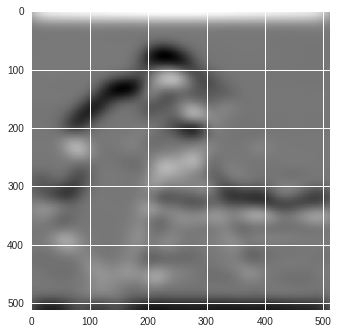

In [62]:
res = convolved_img.eval(feed_dict={
    img: data.camera(), mean:0.0, sigma:1.0, ksize:100})
plt.imshow(res, cmap='gray')

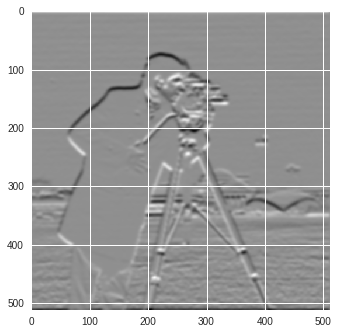

In [63]:
res = convolved_img.eval(feed_dict={
    img: data.camera(),
    mean: 0.0,
    sigma: 0.5,
    ksize: 32
  })
plt.imshow(res, cmap='gray')